<a href="https://colab.research.google.com/github/omkenge/cookbook/blob/new-example-plant/examples/Plant_Health_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.


In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Plant Health Diagnosis System


<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Plant_Health_Analyzer.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/>


Purpose: Analyzes workout poses using AI to provide real-time form correction

Flow:

*   Configure common exercises and evaluation criteria
*   User uploads workout photo
*   Gemini evaluates against exercise standards
*   Generates scored feedback with improvement tips


In [1]:
%pip install -U -q "google-genai>=1.0.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.7/159.7 kB 5.7 MB/s eta 0:00:00


#### Importing the required packages


In [5]:
from google import genai
from google.colab import userdata
genai.__version__
import requests
import datetime
from PIL import Image
from IPython.display import display , Markdown
import os
from google.colab import files

## Set up your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](../quickstarts/Authentication.ipynb) quickstart for an example.


In [6]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
# Genai client
client = genai.Client(api_key=GOOGLE_API_KEY)

In [7]:
MODEL_ID="gemini-2.0-flash" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.0-pro-exp-02-05"] {"allow-input":true, isTemplate: true}

## Helper Function


In [8]:
class PlantConfig:
    def __init__(self):
        self.common_plants = {
            'tomato': ['blight', 'mosaic virus', 'blossom rot'],
            'rose': ['black spot', 'powdery mildew', 'rust'],
            'cucumber': ['downy mildew', 'anthracnose']
        }
        self.severity_levels = ['low', 'medium', 'critical']

config = PlantConfig()

📸 Upload plant leaf image:


Saving p.jpg to p.jpg


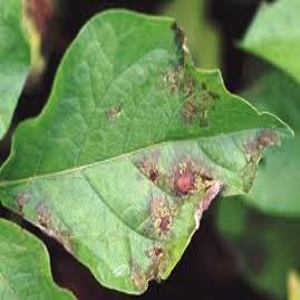

In [9]:
class PlantImageSystem:
    def __init__(self):
        self.uploads = files.upload()
        self.image_path = next(iter(self.uploads))
        self.img = Image.open(self.image_path)
        self.timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M")

    def display_plant(self):
        display(self.img.resize((300, 300)))
print("📸 Upload plant leaf image:")
img_system = PlantImageSystem()
img_system.display_plant()

In [10]:
class DiseaseDetector:
    def __init__(self, image_system):
        self.image_system = image_system
        self.analysis_result = None

    def run_diagnosis(self):

        prompt = f"""
            Analyze plant leaf image for:
            1. Disease identification (from {config.common_plants})
            2. Severity assessment ({config.severity_levels})
            3. Treatment suggestions

            Format response as:
            DISEASE: [name]
            SEVERITY: [level]
            TREATMENT: [steps]
            NOTES: [additional observations]
        """
        self.analysis_result = client.models.generate_content(
            model=MODEL_ID,
            contents=[prompt, self.image_system.img]
        )
print("🔍 Analyzing plant health...")
diagnosis_engine = DiseaseDetector(img_system)
diagnosis_engine.run_diagnosis()


🔍 Analyzing plant health...


In [11]:
class HealthReport:
    def __init__(self, diagnosis):
        self.diagnosis = diagnosis.analysis_result.text
        self.report = f"# 🌿 Plant Health Report\n**Date:** {img_system.timestamp}\n\n"

    def _parse_response(self):
        sections = {}
        current_section = None  # Initialize current_section to None
        for line in self.diagnosis.split('\n'):
            if ':' in line:
                key, value = line.split(':', 1)
                sections[key.strip()] = value.strip()
                current_section = key.strip()
            elif current_section:  # Only append if current_section is not None
                sections[current_section] += '\n' + line.strip()
        return sections

    def generate(self):
        sections = self._parse_response()
        for key in ['DISEASE', 'SEVERITY', 'TREATMENT', 'NOTES']:
            self.report += f"**{key.title()}:** {sections.get(key, 'N/A')}\n\n"
        return self.report

In [12]:
report_maker = HealthReport(diagnosis_engine)
Markdown(report_maker.generate())

# 🌿 Plant Health Report
**Date:** 2025-04-24 15:26

**Disease:** Blight (likely tomato blight, assuming the leaf belongs to a tomato plant)

**Severity:** Medium

**Treatment:** 
1. Remove and destroy affected leaves promptly to prevent spread.
2. Apply a copper-based fungicide, following the product instructions carefully.
3. Ensure good air circulation around the plant. Prune if necessary.
4. Avoid overhead watering, as this can promote the spread of fungal spores.
5. Monitor the plant regularly for new symptoms.

**Notes:** The dark, irregular lesions on the leaf margins and within the leaf tissue suggest blight. The severity is moderate due to the presence of lesions on multiple areas of the leaf. Because I do not know with certainty what kind of leaf is pictured, blight is only a possible identification. A plant's leaf can only be assessed as having a tomato-related disease if it is verified that it is a tomato leaf.

